### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy import stats

### Ingest data into Dataframe

### Electricity price monthly data

In [2]:
#FILE_PATH = '/Users/apoor/Desktop/Anjali/MSDAIS/Analytics/Assignments/Project/'
FILE_PATH = (r'\Users\harsh\Desktop\Analytics\Group Project/')

In [2]:
df_electricity = pd.read_csv('Average_retail_price_of_electricity_monthly_py.csv')
df_electricity.dtypes

Month                 object
Electricity_Price    float64
dtype: object

### Gasoline price monthly data

In [4]:
df_gasoline = pd.read_excel(FILE_PATH + 'Retail_sales_of_gasoline_monthly.xlsx',skiprows = 9)
df_gasoline.dtypes

Year              datetime64[ns]
Gasoline Price           float64
dtype: object

### Data Cleaning

In [4]:
# Missing data, Outliers, Correcting data types

#Check isnull
print(df_electricity.isnull().sum())
print()
print(df_gasoline.isnull().sum())

Month                0
Electricity_Price    0
dtype: int64



In [5]:
#Drop nan values
print(df_electricity)
df_electricity_clean = df_electricity.dropna()
print(df_electricity_clean)
# print(df_gasoline)
print()
df_gasoline_clean = df_gasoline.dropna()
print(df_gasoline_clean)

         Month  Electricity_Price
0     1/1/2001               7.73
1     2/1/2001               8.04
2     3/1/2001               8.32
3     4/1/2001               8.46
4     5/1/2001               8.83
..         ...                ...
237  10/1/2020              13.70
238  11/1/2020              13.35
239  12/1/2020              12.80
240   1/1/2021              12.69
241   2/1/2021              13.34

[242 rows x 2 columns]
         Month  Electricity_Price
0     1/1/2001               7.73
1     2/1/2001               8.04
2     3/1/2001               8.32
3     4/1/2001               8.46
4     5/1/2001               8.83
..         ...                ...
237  10/1/2020              13.70
238  11/1/2020              13.35
239  12/1/2020              12.80
240   1/1/2021              12.69
241   2/1/2021              13.34

[242 rows x 2 columns]



In [8]:
#To remove Electricity data outliers
q1 = df_electricity_clean['Electricity_Price'].quantile(0.25)
q3 = df_electricity_clean['Electricity_Price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_electricity_clean_out = df_electricity_clean.loc[(df_electricity_clean['Electricity_Price'] > fence_low) & (df_electricity_clean['Electricity_Price'] < fence_high)]
df_electricity_clean_out
print(q1)
print(iqr)
print(q3)

9.8475
2.8324999999999996
12.68


In [8]:
#To remove Gasoline data outliers
quat1 = df_gasoline_clean['Gasoline Price'].quantile(0.25)
quat3 = df_gasoline_clean['Gasoline Price'].quantile(0.75)
iqrg = quat3-quat1 #Interquartile range
low  = quat1-1.5*iqrg
high = quat3+1.5*iqrg
df_gasoline_clean_out = df_gasoline_clean.loc[(df_gasoline_clean['Gasoline Price'] > low) & (df_gasoline_clean['Gasoline Price'] < high)]
df_gasoline_clean_out
print(quat1)
print(iqrg)
print(quat3)

1.893
1.0410000000000001
2.934


## Electricity Boxplot

In [9]:
L2 = df_electricity_clean['Electricity_Price']

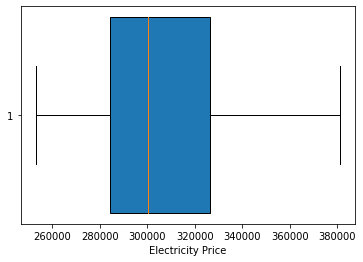

In [10]:
plt.boxplot(L2, vert=False, manage_ticks = True, widths = 0.9, patch_artist = True, showfliers= True, )
plt.xlabel('Electricity Price')
plt.show()

## Electricity Boxplot

### 1. IQR is approximately 300000. 
### 2. Q1 is approximately 285000. It means that at least 25% of the time the electricity price has been 285000.
### 3. Q3 is approximately 325000. It can be inferred that the electricity price has been approximately 325000.
### 4. The box plot is positive skewed, the data is concentrated on the right. That means the mean is greater than the median. The average electricity price is more than the median

In [11]:
df_electricity_clean.mean()

Electricity Price    306706.876001
dtype: float64

In [12]:
df_electricity_clean.median()

Electricity Price    300119.1567
dtype: float64

## Gasoline Boxplot

In [13]:
L3 = df_gasoline_clean['Gasoline Price']

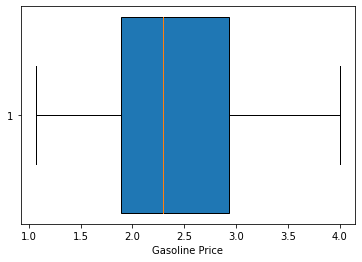

In [14]:
plt.boxplot(L3, vert=False, manage_ticks = True, widths = 0.9, patch_artist = True, showfliers= True, )
plt.xlabel('Gasoline Price')
plt.show()

## Gasoline Boxplot

### 1. IQR is approximately 2.3. 
### 2. Q1 is approximately 1.9. It means that at least 25% of the time the gasoline price has been 1.9 or close to 2.
### 3. Q3 is approximately 2.95. It can be inferred 75% of the time the electricity price has been approximately 2.95 or 3.
### 4. The box plot is positive skewed, the data is concentrated on the right. That means the mean is greater than the median. The average gasoline price is more than the median.

In [15]:
df_gasoline_clean.mean()

<ipython-input-15-e5826c191ae7>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_gasoline_clean.mean()


Gasoline Price    2.407427
dtype: float64

In [16]:
df_gasoline_clean.median()

<ipython-input-16-9f7fbc8040d5>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_gasoline_clean.median()


Gasoline Price    2.299
dtype: float64

## Histogram Electricity

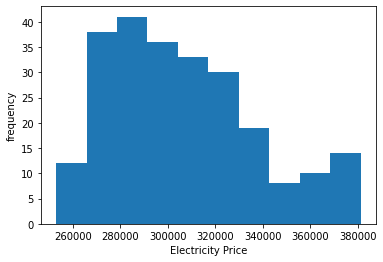

In [36]:
plt.ylabel('frequency')
plt.xlabel('Electricity Price')
plt.hist(L2)
plt.show()

In [18]:
df_electricity_clean.min()

Month                Apr-01
Electricity Price    253034
dtype: object

In [19]:
df_electricity_clean.max()

Month                Sep-20
Electricity Price    381192
dtype: object

In [27]:
df_electricity_clean.count()

Month                241
Electricity Price    241
dtype: int64

## Interpretations
### 1. The minimum electricity price has been 253034 in the month of April in 2001.
### 2. The maximimum price was in September 2020 which was 381192.
### 3. 

## Histogram Gasoline

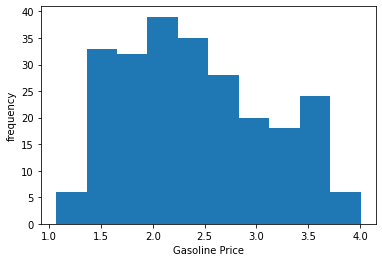

In [20]:
plt.ylabel('frequency')
plt.xlabel('Gasoline Price')
plt.hist(L3)
plt.show()

In [21]:
df_gasoline_clean.min()

Year              2001-01-01 00:00:00
Gasoline Price                  1.067
dtype: object

In [22]:
df_gasoline_clean.max()

Year              2021-01-01 00:00:00
Gasoline Price                  4.004
dtype: object

## Interpretations
### 1. The minimum gasoline price was 1.06 in the month of January 2001.
### 2. The maximum price of gasoline was 4.004 in the month of January 2021.
### 3. 

In [10]:
df_electricity_clean.describe()

,Electricity_Price
count,242.000000
mean,11.255207
std,1.638465
min,7.730000
25%,9.847500
50%,11.780000
75%,12.680000
max,13.700000


In [11]:
eq1 = df_electricity_clean['Electricity_Price'].quantile(0.25)
eq3 = df_electricity_clean['Electricity_Price'].quantile(0.75)
eIQR = eq3 - eq1
print(f"IQR = {format(eIQR, '.2f')}")

IQR = 2.83


In [25]:
df_gasoline_clean.describe()

,Gasoline Price
count,241.000000
mean,2.407427
std,0.705189
min,1.067000
25%,1.893000
50%,2.299000
75%,2.934000
max,4.004000


In [26]:
gq1 = df_gasoline_clean['Gasoline Price'].quantile(0.25)
gq3 = df_gasoline_clean['Gasoline Price'].quantile(0.75)
gIQR = gq3 - gq1
print(f"IQR = {format(gIQR, '.2f')}")

IQR = 1.04
